<a href="https://colab.research.google.com/github/beamconan/ML/blob/master/LAB_3_To.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB_3

### ตอนที่ 1: การทดลองเตรียมข้อมูล ปรับค่าข้อมูล และจัดแบ่งชุด Train, Test เพื่อสอนโมเดล 

### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import seaborn

In [2]:
data_bj  = pd.read_csv('./pm-25-data/BeijingPM20100101_20151231.csv')
data_cd = pd.read_csv('./pm-25-data/ChengduPM20100101_20151231.csv')
data_bj
data_cd

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,3.0,86.89,1021.0,5.0,cv,1.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,2.0,86.79,1021.0,4.0,cv,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,176.0,225.0,262.0,7.0,87.28,1027.0,9.0,NW,2.0,0.0,0.0
52580,52581,2015,12,31,20,4,146.0,181.0,218.0,7.0,87.28,1028.0,9.0,NW,4.0,0.0,0.0
52581,52582,2015,12,31,21,4,162.0,175.0,213.0,7.0,87.28,1028.0,9.0,cv,1.0,0.0,0.0
52582,52583,2015,12,31,22,4,169.0,192.0,236.0,7.0,93.40,1028.0,8.0,NW,2.0,0.0,0.0


In [3]:
df_bj= pd.DataFrame(data_bj,columns=['HUMI','PRES','Iws','Iprec'])
df_cd= pd.DataFrame(data_cd,columns=['HUMI','PRES','Iws','Iprec'])
df_bj

,HUMI,PRES,Iws,Iprec
0,43.0,1021.0,1.79,0.0
1,47.0,1020.0,4.92,0.0
2,43.0,1019.0,6.71,0.0
3,55.0,1019.0,9.84,0.0
4,51.0,1018.0,12.97,0.0
...,...,...,...,...
52579,68.0,1031.0,7.14,0.0
52580,63.0,1030.0,8.03,0.0
52581,73.0,1030.0,0.89,0.0
52582,73.0,1030.0,1.78,0.0


In [4]:
date_bj = pd.to_datetime(pd.DataFrame(data_bj,columns=['year','month','day','hour']))
date_bj

0       2010-01-01 00:00:00
1       2010-01-01 01:00:00
2       2010-01-01 02:00:00
3       2010-01-01 03:00:00
4       2010-01-01 04:00:00
                ...        
52579   2015-12-31 19:00:00
52580   2015-12-31 20:00:00
52581   2015-12-31 21:00:00
52582   2015-12-31 22:00:00
52583   2015-12-31 23:00:00
Length: 52584, dtype: datetime64[ns]

In [5]:
date_cd = pd.to_datetime(pd.DataFrame(data_cd,columns=['year','month','day','hour']))
date_cd

0       2010-01-01 00:00:00
1       2010-01-01 01:00:00
2       2010-01-01 02:00:00
3       2010-01-01 03:00:00
4       2010-01-01 04:00:00
                ...        
52579   2015-12-31 19:00:00
52580   2015-12-31 20:00:00
52581   2015-12-31 21:00:00
52582   2015-12-31 22:00:00
52583   2015-12-31 23:00:00
Length: 52584, dtype: datetime64[ns]

In [6]:
df_bj['Time'] = date_cd
df_bj['city'] = 'Beijing'
df_bj = df_bj[['Time', 'HUMI','PRES','Iws','Iprec','city']]
df_bj

,Time,HUMI,PRES,Iws,Iprec,city
0,2010-01-01 00:00:00,43.0,1021.0,1.79,0.0,Beijing
1,2010-01-01 01:00:00,47.0,1020.0,4.92,0.0,Beijing
2,2010-01-01 02:00:00,43.0,1019.0,6.71,0.0,Beijing
3,2010-01-01 03:00:00,55.0,1019.0,9.84,0.0,Beijing
4,2010-01-01 04:00:00,51.0,1018.0,12.97,0.0,Beijing
...,...,...,...,...,...,...
52579,2015-12-31 19:00:00,68.0,1031.0,7.14,0.0,Beijing
52580,2015-12-31 20:00:00,63.0,1030.0,8.03,0.0,Beijing
52581,2015-12-31 21:00:00,73.0,1030.0,0.89,0.0,Beijing
52582,2015-12-31 22:00:00,73.0,1030.0,1.78,0.0,Beijing


In [7]:
df_cd['Time'] = date_cd
df_cd['city'] = 'Chengdu'
df_cd = df_cd[['Time', 'HUMI','PRES','Iws','Iprec','city']]
df_cd

,Time,HUMI,PRES,Iws,Iprec,city
0,2010-01-01 00:00:00,81.20,1022.0,1.0,0.0,Chengdu
1,2010-01-01 01:00:00,86.99,1022.0,1.0,0.0,Chengdu
2,2010-01-01 02:00:00,86.99,1021.0,1.0,0.0,Chengdu
3,2010-01-01 03:00:00,86.89,1021.0,1.0,0.0,Chengdu
4,2010-01-01 04:00:00,86.79,1021.0,1.0,0.0,Chengdu
...,...,...,...,...,...,...
52579,2015-12-31 19:00:00,87.28,1027.0,2.0,0.0,Chengdu
52580,2015-12-31 20:00:00,87.28,1028.0,4.0,0.0,Chengdu
52581,2015-12-31 21:00:00,87.28,1028.0,1.0,0.0,Chengdu
52582,2015-12-31 22:00:00,93.40,1028.0,2.0,0.0,Chengdu


In [8]:
#no cleasing data
raw_data = df_bj.append(df_cd, ignore_index=False, sort=True)
raw_data

,HUMI,Iprec,Iws,PRES,Time,city
0,43.00,0.0,1.79,1021.0,2010-01-01 00:00:00,Beijing
1,47.00,0.0,4.92,1020.0,2010-01-01 01:00:00,Beijing
2,43.00,0.0,6.71,1019.0,2010-01-01 02:00:00,Beijing
3,55.00,0.0,9.84,1019.0,2010-01-01 03:00:00,Beijing
4,51.00,0.0,12.97,1018.0,2010-01-01 04:00:00,Beijing
...,...,...,...,...,...,...
52579,87.28,0.0,2.00,1027.0,2015-12-31 19:00:00,Chengdu
52580,87.28,0.0,4.00,1028.0,2015-12-31 20:00:00,Chengdu
52581,87.28,0.0,1.00,1028.0,2015-12-31 21:00:00,Chengdu
52582,93.40,0.0,2.00,1028.0,2015-12-31 22:00:00,Chengdu


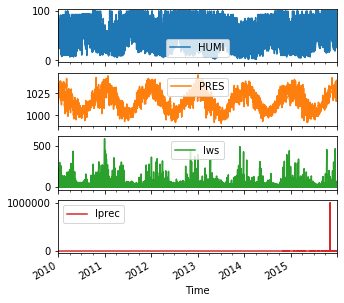

In [9]:
axes = df_bj.plot(x='Time', subplots=True, figsize=(5, 5))

In [10]:
df_bj[df_bj.columns[1:5]] = df_bj[df_bj.columns[1:5]].apply(pd.to_numeric, errors='coerce')
# df_bj = df_bj.fillna(df_bj.median()) # จัดการข้อมูลหาย แทนที่ด้วย median
df_bj = df_bj.dropna()
df_bj = df_bj.drop_duplicates()
df_bj

,Time,HUMI,PRES,Iws,Iprec,city
0,2010-01-01 00:00:00,43.0,1021.0,1.79,0.0,Beijing
1,2010-01-01 01:00:00,47.0,1020.0,4.92,0.0,Beijing
2,2010-01-01 02:00:00,43.0,1019.0,6.71,0.0,Beijing
3,2010-01-01 03:00:00,55.0,1019.0,9.84,0.0,Beijing
4,2010-01-01 04:00:00,51.0,1018.0,12.97,0.0,Beijing
...,...,...,...,...,...,...
52579,2015-12-31 19:00:00,68.0,1031.0,7.14,0.0,Beijing
52580,2015-12-31 20:00:00,63.0,1030.0,8.03,0.0,Beijing
52581,2015-12-31 21:00:00,73.0,1030.0,0.89,0.0,Beijing
52582,2015-12-31 22:00:00,73.0,1030.0,1.78,0.0,Beijing


In [11]:
df_cd[df_cd.columns[1:5]] = df_cd[df_cd.columns[1:5]].apply(pd.to_numeric, errors='coerce')
df_cd = df_cd.dropna()
df_cd = df_cd.drop_duplicates()
df_cd

,Time,HUMI,PRES,Iws,Iprec,city
0,2010-01-01 00:00:00,81.20,1022.0,1.0,0.0,Chengdu
1,2010-01-01 01:00:00,86.99,1022.0,1.0,0.0,Chengdu
2,2010-01-01 02:00:00,86.99,1021.0,1.0,0.0,Chengdu
3,2010-01-01 03:00:00,86.89,1021.0,1.0,0.0,Chengdu
4,2010-01-01 04:00:00,86.79,1021.0,1.0,0.0,Chengdu
...,...,...,...,...,...,...
52579,2015-12-31 19:00:00,87.28,1027.0,2.0,0.0,Chengdu
52580,2015-12-31 20:00:00,87.28,1028.0,4.0,0.0,Chengdu
52581,2015-12-31 21:00:00,87.28,1028.0,1.0,0.0,Chengdu
52582,2015-12-31 22:00:00,93.40,1028.0,2.0,0.0,Chengdu


In [12]:
result = df_bj.append(df_cd, ignore_index=False, sort=True)
result

,HUMI,Iprec,Iws,PRES,Time,city
0,43.00,0.0,1.79,1021.0,2010-01-01 00:00:00,Beijing
1,47.00,0.0,4.92,1020.0,2010-01-01 01:00:00,Beijing
2,43.00,0.0,6.71,1019.0,2010-01-01 02:00:00,Beijing
3,55.00,0.0,9.84,1019.0,2010-01-01 03:00:00,Beijing
4,51.00,0.0,12.97,1018.0,2010-01-01 04:00:00,Beijing
...,...,...,...,...,...,...
52579,87.28,0.0,2.00,1027.0,2015-12-31 19:00:00,Chengdu
52580,87.28,0.0,4.00,1028.0,2015-12-31 20:00:00,Chengdu
52581,87.28,0.0,1.00,1028.0,2015-12-31 21:00:00,Chengdu
52582,93.40,0.0,2.00,1028.0,2015-12-31 22:00:00,Chengdu


In [13]:
result = result.sort_values(by=['Time'])

In [14]:
g = sns.PairGrid(result,hue='city',hue_kws={"cmap":["Blues","Purples"]},)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.distplot)

NameError: name 'sns' is not defined

In [15]:
df = result[['Time', 'HUMI','PRES','Iws','Iprec','city']]
df_feature = df[df.columns[1:5]]
df_feature

,HUMI,PRES,Iws,Iprec
0,43.00,1021.0,1.79,0.0
0,81.20,1022.0,1.00,0.0
1,47.00,1020.0,4.92,0.0
1,86.99,1022.0,1.00,0.0
2,43.00,1019.0,6.71,0.0
...,...,...,...,...
52581,87.28,1028.0,1.00,0.0
52582,73.00,1030.0,1.78,0.0
52582,93.40,1028.0,2.00,0.0
52583,79.00,1029.0,2.67,0.0


In [16]:
df.city = pd.Categorical(pd.factorize(df.city)[0])

In [17]:
df_labels = df['city']
df_labels

0        0
0        1
1        0
1        1
2        0
        ..
52581    1
52582    0
52582    1
52583    0
52583    1
Name: city, Length: 100852, dtype: category
Categories (2, int64): [0, 1]

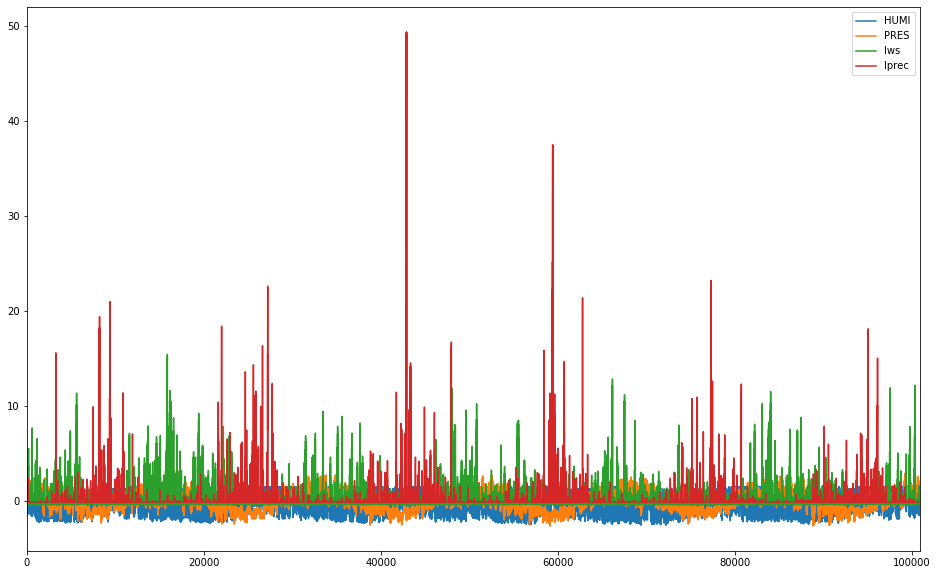

In [18]:
columns = ['HUMI','PRES','Iws','Iprec']
standard_scaler = preprocessing.StandardScaler() #Standardized Norm
x_standard_scaled = standard_scaler.fit_transform(df_feature)
df_feature = pd.DataFrame(x_standard_scaled,columns=columns)
df_feature.plot(figsize=(16, 10))

In [36]:
timestep = 4
stride = 10
y = []
X = []
for i in range(4,len(df)-timestep+1,stride):
    X.append(df_feature.iloc[i:i+timestep].to_numpy())
    y.append(df_labels.iloc[i:i+timestep].to_numpy())
X = np.array(x)
y = np.array(y)

X.shape,y.shape

((10085, 4, 4), (10085, 4))

In [37]:
y

array([[0, 1, 0, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 0],
       ...,
       [1, 0, 0, 1],
       [1, 0, 1, 0],
       [0, 1, 0, 1]], dtype=int64)

#### Train Test split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
print("X_train =" ,X_train)
print("y_train =" ,y_train)
print("X_test =" ,X_test)
print("y_test =" ,y_test)

X_train = [[[-0.39271321  1.63746692 -0.33376313 -0.09991915]
  [ 0.98053216  0.56494358 -0.27384576 -0.0110851 ]
  [-0.39271321  1.63746692 -0.35778406 -0.09991915]
  [ 0.98053216  0.67219591 -0.27384576  0.166583  ]]

 [[ 0.99992595 -0.07857043 -0.35481518 -0.09991915]
  [ 0.43255444  0.67219591 -0.35778406 -0.09991915]
  [ 0.99992595  0.02868191 -0.32782537 -0.09991915]
  [-0.31018644  0.67219591 -0.33349323 -0.09991915]]

 [[ 0.7626615  -0.07857043 -0.32161772 -0.09991915]
  [ 0.7894827   0.02868191 -0.19287634 -0.09991915]
  [ 0.51508121 -0.07857043 -0.27330596 -0.09991915]
  [ 0.7894827   0.02868191 -0.35481518 -0.09991915]]

 ...

 [[-0.97040057 -1.15109377  0.6438077  -0.09991915]
  [-0.84661042 -1.04384143  0.77659755 -0.09991915]
  [-1.62071148 -0.72208443 -0.27384576 -0.09991915]
  [-1.48247914 -0.72208443 -0.32782537 -0.09991915]]

 [[-0.03908602 -1.14036854 -0.11190691 -0.09991915]
  [-1.17671748 -1.15109377 -0.21284879 -0.09991915]
  [ 0.11276323 -1.14036854  0.02304212 -

### ตอนที่ 2: การทดลองสร้าง สอน และ ทดสอบโมเดล เพื่อดูค่าความแม่นยำเบื้องต้นของแต่ละโมเดล (CNN, LSTM) 

In [42]:
from keras import Sequential
from keras.layers import Conv1D, Conv2D, LSTM, Dense, Dropout, Flatten, BatchNormalization, Reshape
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [44]:
Input_shape = X_train.shape

In [50]:
Output_shape

(6756, 4)

#### Model CNN

In [55]:
model = Sequential() 
model.add(Conv2D(8,kernel_size=4, activation='relu', input_shape=Input_shape, padding='same'))
model.add(Flatten()) 
model.add(Dense(10 , activation= 'relu' )) 
model.summary() 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 6756, 4, 8)        520       
_________________________________________________________________
flatten_8 (Flatten)          (None, 216192)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2161930   
Total params: 2,162,450
Trainable params: 2,162,450
Non-trainable params: 0
_________________________________________________________________
